<a href="https://colab.research.google.com/github/ehdob-cid20/trabalho-pratico/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  Pré Processamento

## Importando as bibliotecas

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importando o *dataset*

### Verifica se o dataset já foi importado para o google drive

Um script que verifica se o dataset já foi importado para o google drive. Caso ainda não tenha sido importado, ele faz o download do arquivo e extrai para a pasta informada na variável **dirName**.

Variáveis:

> **datasetFileName** é o nome do arquivo com extensão.

> **datsetUrl** é o endereço web onde o arquivo está disponível.

> **dirName** é o diretório do google drive onde o dataset será salvo.

Nota: O diretório de salvamento (*dirName*) precisa existir.


In [18]:
import os

datasetFileName = 'dados-curso-completo.csv.tar.gz'
datsetUrl = 'http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz'
dirName = 'trabalho-pratico' # Este diretorio pode ser alterado se ja tiver o dataset no google drive.

if False == os.path.isfile('/content/drive/My Drive/' + dirName + '/' + datasetFileName[:-7]):
  if False == os.path.isdir('/content/drive'):
    print('Google driver não está montado!')
  elif False == os.path.isdir('/content/drive/My Drive/' +  dirName + '/'):
    print('Diretório ' + dirName + ' não encontrado.')
  elif False == os.path.isfile('/content/drive/My Drive/' + dirName + '/' + datasetFileName):
    !wget -O '/content/drive/My Drive/$dirName/$datasetFileName' '$datsetUrl' #TODO: handle download errors.
    !tar -C '/content/drive/My Drive/$dirName/{datasetFileName[:-7]}' -zxf '/content/drive/My Drive/$dirName/$datasetFileName' #TODO: handle extract errors.
  else:
    !tar -C '/content/drive/My Drive/$dirName/' -zxf '/content/drive/My Drive/$dirName/$datasetFileName' #TODO: handle extract errors.
else:
  print('O dataset ' + datasetFileName[:-7] + ' foi encontrado.')

O dataset dados-curso-completo.csv foi encontrado.


### Importando o *dataset* usando pandas

In [19]:
dataset = pd.read_csv('/content/drive/My Drive/' + dirName + '/' + datasetFileName[:-7])

## Visualizando o *dataset* inicial (sem qualquer tratamento)

### Sumário para o campo *usuario*

**Resumo geral:**
> Possui 1.658.768 campos, onde 632.601 são únicos e 57 estão nulos.

> Usuário com maior frequência '.',  aparece 1624.

In [20]:
dataset.usuario.describe()

count     1658768
unique     632601
top             .
freq         1624
Name: usuario, dtype: object

In [21]:
print ('Número de campos nulos: ' +str(dataset.usuario.isnull().sum()))

Número de campos nulos: 57


### Sumário para o campo ***texto***

**Resuno geral:**
> Possui 1658825 campos, onde 1653599 são únicos


> Texto com maior frequência "covid 19? desculpa eu entendi convite para ficar de love", frequência do texto 120.

In [22]:
dataset.texto.describe()

count                                               1658825
unique                                              1653599
top       covid 19? desculpa eu entendi convite pra fica...
freq                                                    120
Name: texto, dtype: object

**Texto duplicados:**


> Os texto que possuem maior duplicidade são:

*   covid 19? desculpa eu entendi convite para ficar de love
*   e vamos de pandemia
* Temos muitos infectados, mas não é de coronavírus, é maldade e inveja...
* e vamos de isolamento social

In [23]:
filtro_duplicado = dataset.filter(like='texto')
filtro_duplicado.texto.value_counts()

covid 19? desculpa eu entendi convite pra ficar de love                                                                                         120
e vamos de pandemia                                                                                                                              82
Tem muitos infectados, mas não é de coronavírus, é de maldade e inveja...                                                                        70
e vamos de isolamento social                                                                                                                     63
#Podcast - Tudo sobre o #Coronavirus aqui. Ouça informações e números atualizados do #COVID19 #G1 https://t.co/eyFxEDgVFW                        50
                                                                                                                                               ... 
Odecabe retransmitirá eventos deportivos frente a Covid-19 (+Video) https://t.co/LPxVrJCvML                     

In [24]:
duplicado  = dataset.texto.value_counts().reset_index().rename(columns={'index': 'Texto', 'texto': 'Total'})
duplicado

,Texto,Total
0,covid 19? desculpa eu entendi convite pra fica...,120
1,e vamos de pandemia,82
2,"Tem muitos infectados, mas não é de coronavíru...",70
3,e vamos de isolamento social,63
4,#Podcast - Tudo sobre o #Coronavirus aqui. Ouç...,50
...,...,...
1653594,Odecabe retransmitirá eventos deportivos frent...,1
1653595,Assistam o documentário da Netflix sobre o cor...,1
1653596,Covid-19: São-Tomé alerta para risco de falênc...,1
1653597,@conexaopolitica Esse isolamento social está d...,1


> Grafico para apresentação dos valores duplicados

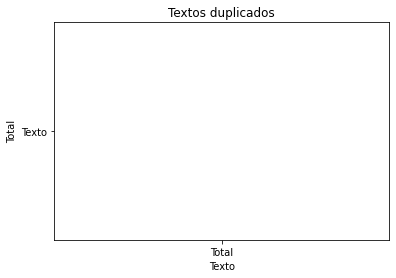

In [25]:
plt.barh('Texto', 'Total', color='blue')
plt.ylabel('Total')
plt.xlabel('Texto')
plt.title('Textos duplicados')
plt.show()

## Aplicando tratamento ao *dataset*

### Removendo duplicatas

### Categorizando variáveis

## Dividindo o dataset em *Training set* e *Test set*